#### Yūgen

# Credit Card Fard Detection

**By Omar Yasser**

## Data Inspection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import math

import warnings
warnings.filterwarnings('ignore')


In [ ]:

df_train = pd.read_csv('split/train.csv')
df_val = pd.read_csv('split/val.csv')
df_test = pd.read_csv('split/test.csv')


print("train shape ", df_train.shape)
print("Val shape ", df_val.shape)
print("test shape ", df_test.shape)

df = pd.concat([df_train, df_val])

trainVal shape  (56960, 31)
train shape  (170884, 31)
Val shape  (56960, 31)
test shape  (56960, 31)


In [14]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,119191.0,2.052427,-0.133236,-1.740621,0.277935,0.337999,-0.826933,0.334629,-0.227039,0.267655,...,-0.006518,0.121300,0.037733,-0.356498,0.147822,0.569149,-0.103929,-0.091958,8.73,0
1,71750.0,1.220356,-0.159191,-0.444349,-0.094437,0.104457,-0.345790,0.170867,-0.094996,0.187572,...,-0.088775,-0.364654,-0.140851,-0.707308,0.415661,1.087767,-0.102532,-0.008335,59.95,0
2,151977.0,0.892824,-1.440698,-0.637940,3.912871,0.099291,2.433288,-0.308891,0.603227,-0.113826,...,0.484969,0.487304,-0.122694,-0.598803,-0.594563,0.062841,-0.033426,0.038254,460.65,0
3,55709.0,-3.146021,2.247634,0.901397,0.146162,-2.109360,-0.148312,-1.533191,2.073663,0.499394,...,0.050567,-0.037019,0.107000,0.392857,0.303597,0.379544,-0.148990,0.074965,4.78,0
4,66654.0,1.194996,-0.007495,0.301285,0.750199,-0.297494,-0.405836,0.060410,-0.150482,0.400860,...,-0.234931,-0.545566,-0.089418,-0.064036,0.527305,0.294221,-0.025980,0.015637,44.31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56955,157788.0,1.904835,-0.680001,-0.516135,0.396361,-0.619691,-0.064527,-0.680489,0.067986,1.350639,...,0.168846,0.519536,0.133577,0.620046,-0.275700,0.541109,-0.038648,-0.033345,64.99,0
56956,152172.0,-2.382148,2.122231,-2.768113,2.230496,2.609249,4.383239,-1.754831,-0.585639,-2.274359,...,-1.247352,0.197706,0.916044,0.627936,-0.550550,-0.246159,-0.792492,-0.180563,3.26,0
56957,33184.0,-0.452707,-0.052302,2.435799,0.299002,-0.676497,1.299249,-0.551163,0.710592,1.109706,...,-0.094673,0.065156,-0.112653,-0.273295,-0.174830,0.490379,0.058140,0.010502,21.50,0
56958,129897.0,1.676970,-0.871091,-1.826132,0.302975,1.804537,4.020960,-0.937191,1.013280,0.725635,...,0.307182,0.611658,0.054429,0.694520,-0.100918,-0.555843,0.050354,-0.012046,145.00,0


In [15]:
df.shape

(227844, 31)

### Columns Overview

In [18]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

- Time: Number of seconds elapsed between this transaction and the first transaction in the dataset
- V1..v28: may be result of a PCA Dimensionality reduction to protect user identities and sensitive features(v1-v28)
- Amount: Transaction amount
- Class: The value 1 is for fraudulent transactions, value 0 is for nonfraudulent transactions

## Some Statistics

In [ ]:
print(df['Time'].describe().T)
print("-----------------------")
print(df['Amount'].describe().T)

count    227844.000000
mean      94879.276847
std       47490.535341
min           0.000000
25%       54255.000000
50%       84798.000000
75%      139400.250000
max      172792.000000
Name: Time, dtype: float64
-----------------------
count    227844.000000
mean         88.059414
std         250.789053
min           0.000000
25%           5.600000
50%          22.000000
75%          77.000000
max       25691.160000
Name: Amount, dtype: float64


In [ ]:
# check for nan and duplicated
dublict = df.duplicated().sum()

print(f"number of nan vlaues = {df.isna().sum().sum()}")

print(f"number of dublicated vlaues = {dublict}")

number of nan vlaues = 0
number of dublicated vlaues = 742


- we can see here that we have some duplicated value let us analyze the to decide whether to remove them or keep them

In [ ]:
duplicates = df[df.duplicated()]

print(duplicates)

           Time        V1        V2        V3        V4        V5        V6  \
1252   111137.0  2.103683  0.030503 -1.438682  0.328226  0.350531 -0.731849   
3262   163152.0 -1.203617  1.574009  2.889277  3.381404  1.538663  3.698747   
4204   122075.0 -1.724438  1.573767 -1.873367 -0.899698 -3.750201  1.042587   
9492    39897.0  1.159796 -0.222744  1.126880  0.671504 -0.874117  0.209904   
11566  163152.0 -1.196037  1.585949  2.883976  3.378471  1.511706  3.717077   
...         ...       ...       ...       ...       ...       ...       ...   
55896  167397.0 -3.635233  1.531985 -2.474082 -0.584569  0.345812 -0.121543   
56376  168351.0 -2.580979  2.630144 -1.493454 -0.988794 -0.850682 -1.395889   
56494   68796.0 -0.863977  0.061255  2.422514  0.840052 -0.358035  0.170426   
56764  166816.0 -1.070922  1.588169 -0.651751 -0.808078  0.231805 -0.501000   
56773   64947.0 -6.370459  3.306401  1.724991 -1.589581  0.174936  0.232403   

             V7        V8        V9  ...       V21 

In [6]:
print(df['Class'].value_counts())

Class
0    227449
1       395
Name: count, dtype: int64


- we can see that we have a huge imbalance in the data 

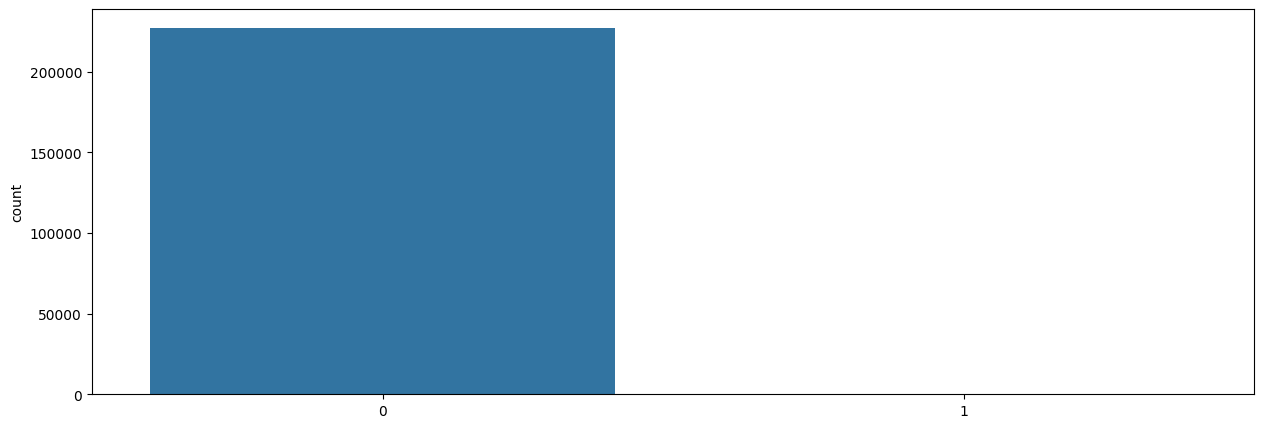

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(y=df['Class'].value_counts(), x=df['Class'].unique())
plt.show()

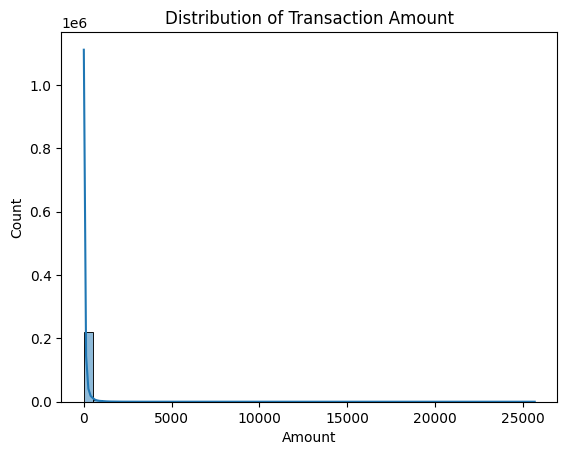

In [ ]:
sns.histplot((df['Amount']), kde=True, bins=50)
plt.title("Distribution of Transaction Amount")
plt.show()

- we can rescle the Amount data with log1p for better understanding
- NOTE log1p = log(1+x)
- but you we will see it does not effect well in the modling you can see that in correaltion matrix section below

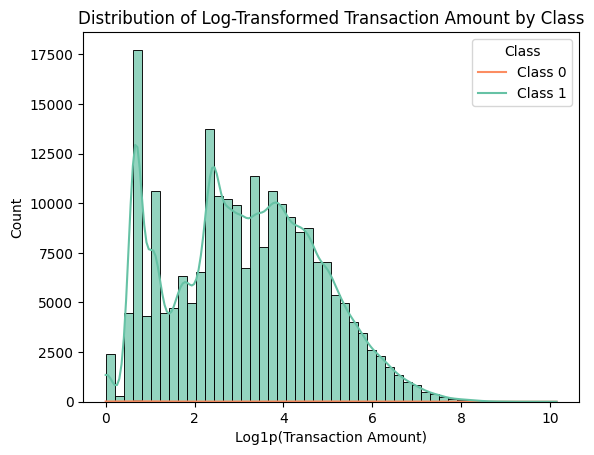

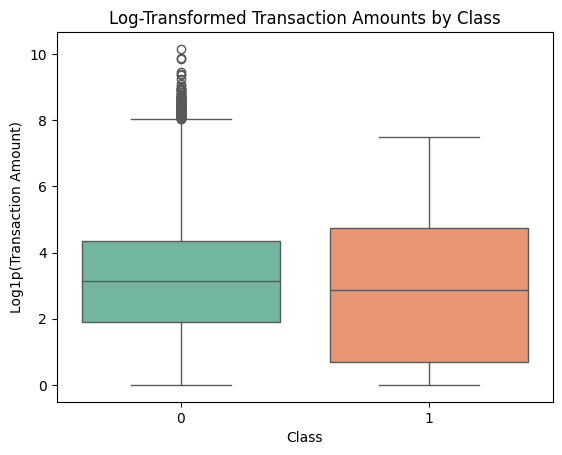

In [35]:
sns.histplot(data=df, x=np.log1p(df['Amount']), hue='Class', kde=True, bins=50, palette='Set2', alpha=0.7)
plt.title("Distribution of Log-Transformed Transaction Amount by Class")
plt.xlabel("Log1p(Transaction Amount)")
plt.ylabel("Count")
plt.legend(title='Class', labels=['Class 0', 'Class 1'])
plt.show()

sns.boxplot(x='Class', y=np.log1p(df['Amount']), data=df, palette='Set2')
plt.title("Log-Transformed Transaction Amounts by Class")
plt.xlabel("Class")
plt.ylabel("Log1p(Transaction Amount)")
plt.show()

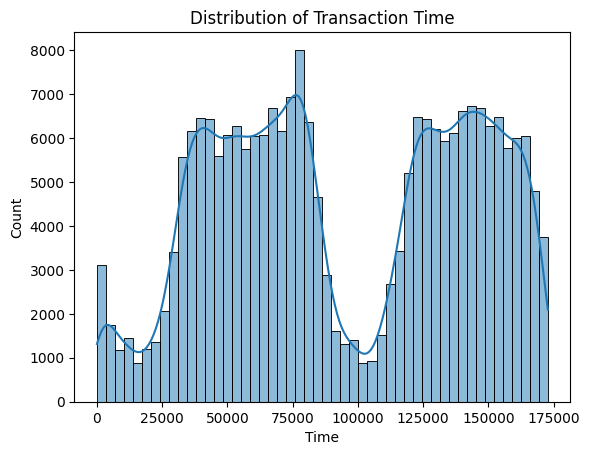

In [39]:
sns.histplot(df['Time'], kde=True, bins=50)
plt.title("Distribution of Transaction Time")
plt.show()

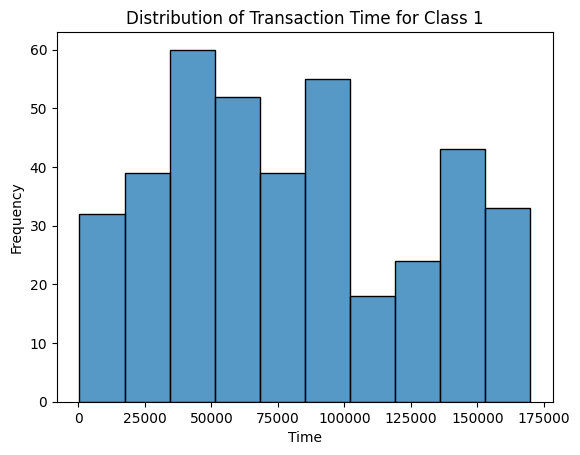

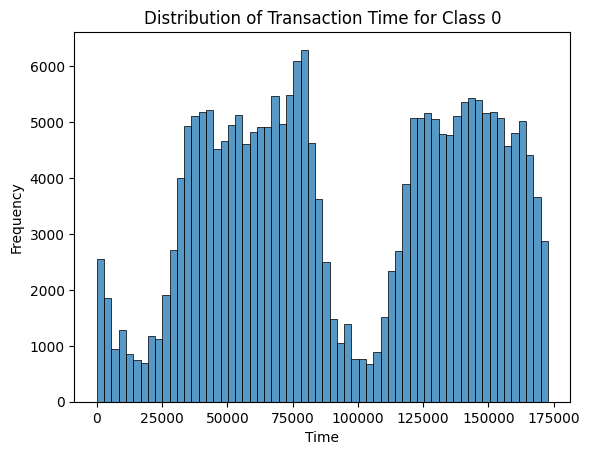

In [24]:
# Filter the data for Class == 1
class_1_data = df[df['Class'] == 1]

# Plot the distribution of Time for Class 1
sns.histplot(class_1_data['Time'])
plt.title("Distribution of Transaction Time for Class 1")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

# Filter the data for Class == 0
class_1_data = df[df['Class'] == 0]

# Plot the distribution of Time for Class 0
sns.histplot(class_1_data['Time'])
plt.title("Distribution of Transaction Time for Class 0")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

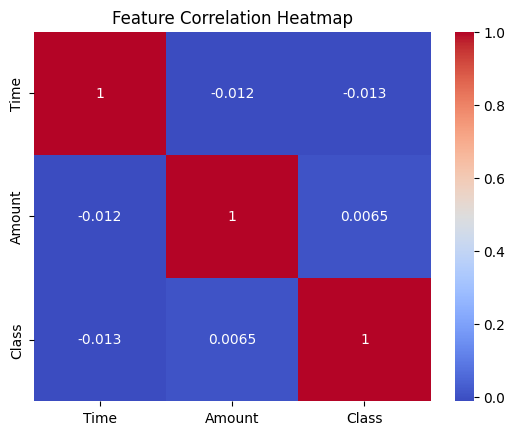

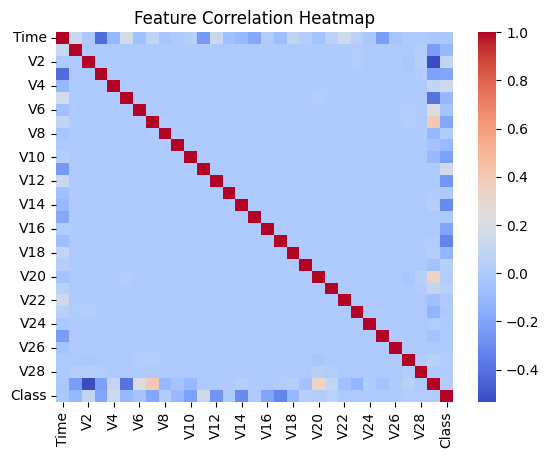

In [48]:
df_corr = df[['Time', 'Amount', 'Class']]
#df_corr['Amount'] = np.log10(df_corr['Amount'])
corr = df_corr.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()


corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

In [13]:
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]

print(fraud.describe().T)
print(non_fraud.describe().T)


        count          mean           std         min           25%  \
Time    395.0  80205.898734  46764.393126  406.000000  41375.000000   
V1      395.0     -4.909043      6.782776  -30.552380     -6.172732   
V2      395.0      3.610484      4.356179   -8.402154      1.133857   
V3      395.0     -7.055224      7.161142  -31.103685     -9.190742   
V4      395.0      4.501345      2.874765   -1.313275      2.287756   
V5      395.0     -3.260969      5.433985  -22.105532     -4.801176   
V6      395.0     -1.375280      1.940279   -6.406267     -2.542436   
V7      395.0     -5.691288      7.249856  -43.557242     -8.662785   
V8      395.0      0.513722      7.178600  -41.044261     -0.241216   
V9      395.0     -2.532470      2.530162  -13.434066     -3.873470   
V10     395.0     -5.697890      4.926411  -24.588262     -7.817077   
V11     395.0      3.777724      2.716527   -1.594258      1.931044   
V12     395.0     -6.285956      4.719144  -18.683715     -8.680644   
V13   

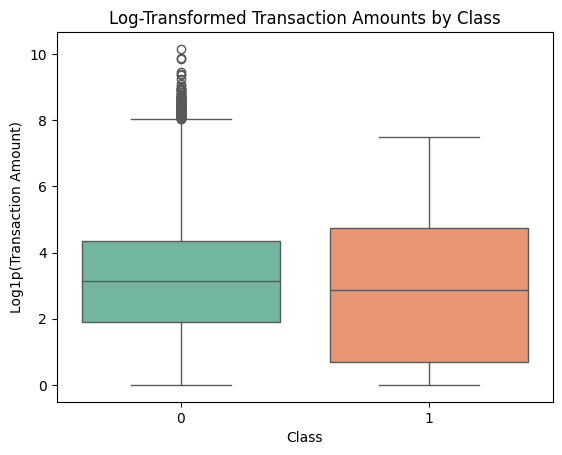

In [34]:
sns.boxplot(x='Class', y=np.log1p(df['Amount']), data=df, palette='Set2')
plt.title("Log-Transformed Transaction Amounts by Class")
plt.xlabel("Class")
plt.ylabel("Log1p(Transaction Amount)")
plt.show()

In [27]:
# Means
mean_class_0 = df[df['Class'] == 0]['Amount'].mean()
mean_class_1 = df[df['Class'] == 1]['Amount'].mean()

# Medians
median_class_0 = df[df['Class'] == 0]['Amount'].median()
median_class_1 = df[df['Class'] == 1]['Amount'].median()

print(f"Mean Amount for Class 0: {mean_class_0}")
print(f"Mean Amount for Class 1: {mean_class_1}")
print(f"Median Amount for Class 0: {median_class_0}")
print(f"Median Amount for Class 1: {median_class_1}")

# Group by 'Class' and calculate summary statistics for 'Amount'
class_stats = df.groupby('Class')['Amount'].describe()
print(class_stats)



Mean Amount for Class 0: 87.99153805908136
Mean Amount for Class 1: 127.1438481012658
Median Amount for Class 0: 22.0
Median Amount for Class 1: 16.48
          count        mean         std  min   25%    50%     75%       max
Class                                                                      
0      227449.0   87.991538  250.781735  0.0  5.67  22.00   77.00  25691.16
1         395.0  127.143848  252.268697  0.0  1.00  16.48  112.39   1809.68


- we can see that for non-frud has smaller Amount of transaction

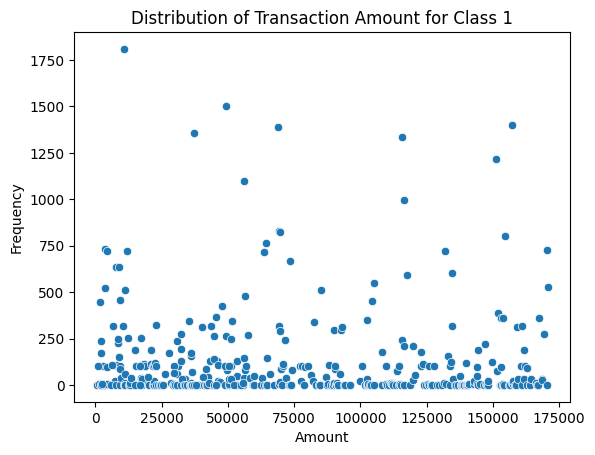

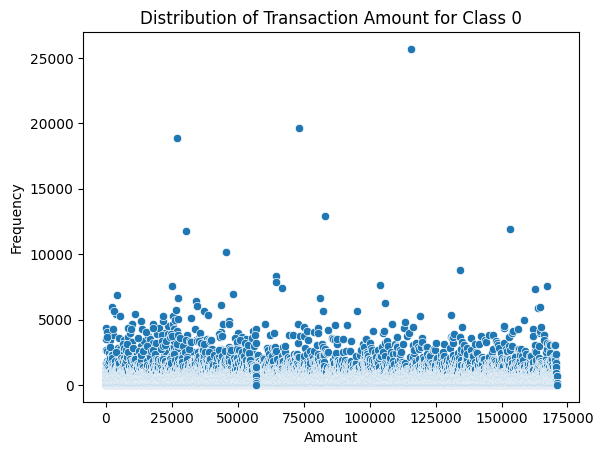

In [20]:
# Filter the data for Class == 1
class_1_data = df[df['Class'] == 1]

# Plot the distribution of Amount for Class 1
sns.scatterplot(class_1_data['Amount'])
plt.title("Distribution of Transaction Amount for Class 1")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()


class_1_data = df[df['Class'] == 0]

# Plot the distribution of Amount for Class 1
sns.scatterplot(class_1_data['Amount'])
plt.title("Distribution of Transaction Amount for Class 0")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

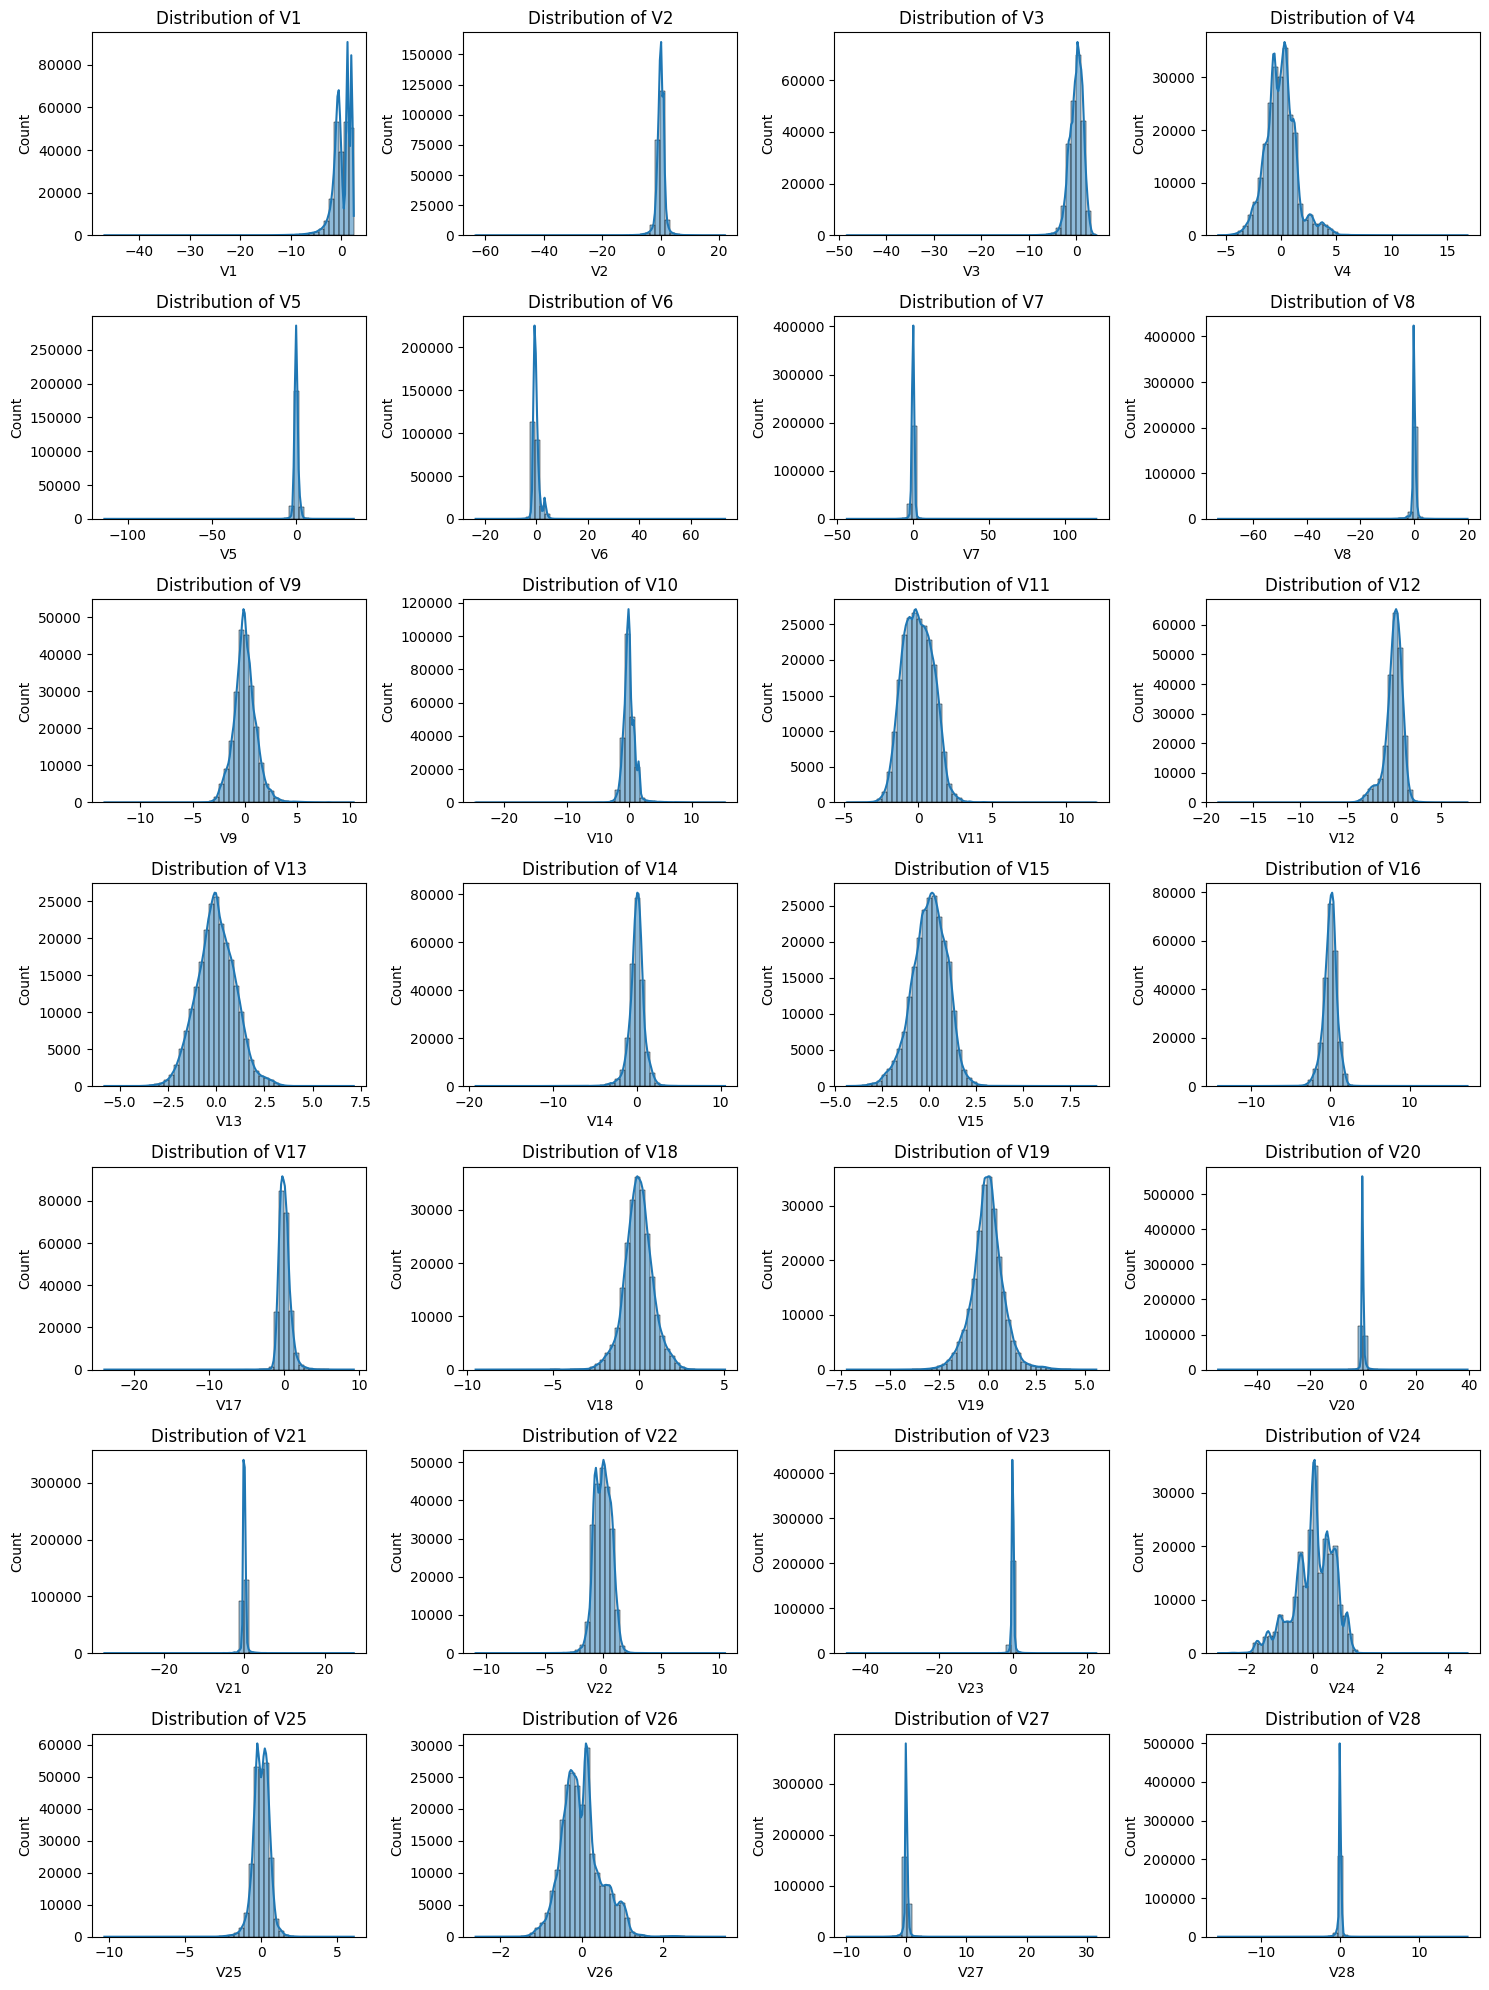

In [49]:
fig, axes = plt.subplots(7, 4, figsize=(15, 20))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot each histogram
for i, col in enumerate([f'V{i}' for i in range(1, 29)]):
    sns.histplot(df[col], kde=True, bins=50, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()